1.	**The names of team member(s)**:

    Yilin Zhang

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, numpy, sqlite3, requests, json, urllib, socket, pycountry, argparse, plotly and beautifulsoup
    You can see "environment.yml" for detail
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/zylzulu/inf510_project and execute the Zhang_Yilin_hw5.py first, then run this notebook. Or run this notebook directly because the dataset I built up is alrealy in the database: final_project.db
   


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    1. This project need more data to make data analysis result more convinciable and reasonable.
    2. The code take long time to scrape the data from database with API. It takes about 2-4 seconds per request. This can be improved with parallel processing or distributed system. 
        Besides, we can use cloud, which is able to save more space and time.
    3. Some of the data cannot be displayed normally because they are written in other language, such as Korean, China.



4.  **Anything else you feel is relevant to the grading of your project your project.**

    There used to be "RuntimeWarning" when running this .ipynb file. But it doesn't influence the result.

5. **What did you set out to study?  
(i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

Nowadays, we are living in a digital world. hundreds of websites are built up, thousands of URLs are generated every day. 
However, challenges comes with progresses. One of them is infringement online. For instance, someone may use of picture of you on their social media account without your permission. 
Specific law and policy are launched to protect the right of the rights owners. Such as DMCA. 
According to section 512 of it, any owner of website content has the right to process a take down notice against the Online Service Provider(OSP). Lumen is a database at Harvard, which keeps a record of the take down notices made to certain major OSPs, e.g. Google.
The notice include type of notice, sender, recipient, jurisdiction, and infringing URLs.

My study was based on the learning of take down notice crawled from Lumen, and the statistic data in terms of Internet usage as different countries scraped from webpage. 
The study aims at finding out how these take down notices issued, which jurisdictions are they pertain to, who were complaining, who were hosting "infringing websites"? Is that correct to say "The scale of infringing websites that were hosting in one country is related to this country's penetration of the Internet?", Does high penetration rate means more notices received? 

Changed: In milestone1, I stated that I will use the API of Ipdata to gather geographic information for all the infringing URLs listed in the take down notice. However, because of the restriction of usage of IPdata's API, I switched to freegeoIP via using API: https://freegeoip.app/json/8.8.8.8

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**
    1. Most senders only sent one take down notice to the Online Service Provider(OSP), however, most of the notices were sent by three organizations who are proficient in helping their clients tracking data, management infringment of their content online, remove the illegal URLs.
    2. Google is the only recipient in my data set, there should be more but Google must receive most of the take down notices from Internet users. 
    3. DMCA is the best legal basis for take down notice. The number of notice regarding dmca is more than 100 times of notices regarding "government_request".
    4. There are 8158 URLs with in 385 notices. Most of the notice is composed of 1 to 10 URLs, while there are small number of notices which contains more than 400 infringing URLs in one notice.
    5. According to the scatter plot, we are confident to say that if there are more facebook user in the country, there must be more Internet user in that country.
    6. More than 73.7% infringing URLs are hosting in the USA. Russia is the second biggest host of infringing URLs. Most of them are host in the North America and the Europe.
    7. With the higher penetration percentage of Internet, there will be more infringing URLs. Our assumption is correct.
        
        

7. **What difficulties did you have in completing the project?**
    1. The webpage is made up of bad quality HTML. It's hard to scrap data from the webpage. There are no specific and unified "id" or "class" or "type" for each row I need in each tables. 
    2. In the take down notice, it is infringing URLs that are stored. However, the input of free geo ip API is the IP address. Thus, I have to convert the URL into IP address. 
    3. Some of the infringing URLs indicated in the notice are from the same Domain, there is no need to process and store all of them in the data set. 
       For example, "https://www.internetworldstats.com/stats1.htm","https://www.internetworldstats.com/stats2.htm" are from the same domain with same IP address. So, parsing URL to "https://www.internetworldstats.com/" before convert to IP address is also need.
    4. Some of the take down notices were not generated in English. Thus, the data contains foreign character which will through runtimeerror while plotting. So, I encode the series with UTF-8 to solved the problem.  
    5. Some of the infringing URLs are no longer accessible. I have to skip them to keep data clean.
    6. Some of the notices have missing values, such as the sender. I have to clean these data out. 

8. **What skills did you wish you had while you were doing the project?**
    1. Proficient with SQL.
    2. Ability to do parellel processing.
    3. Learning about a new library in Python quickly, how to manipulate the parameter that I passed into.  
    

9. **What would you do “next” to expand or augment the project?**
    I'd like to put more energy on the analysis of the status of those original URLs stated in the take down notice. Becuase I notice that some of the URLs are no longer accessible through freeIP's API. 
    But what about others? Didn't Google take them down? Are they still infringing others properties?
    Besides, I think I can add machine learning methods and Natural Language Processing into this peroject. 
    For example, train a classification which is able to distinguish good and bad website based on it's topic extracted from its HTML code(NLP), and it's geographic features (where this website is host?)

In [176]:
import sqlite3
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import Zhang_Yilin_hw5 as ml2
import plotly.graph_objects as go
from numpy.polynomial.polynomial import polyfit
con = sqlite3.connect('final_project.db')
cur = con.cursor()

In [177]:
# take a look at the dataset
df = pd.read_sql_query("SELECT * from notice", con)
df.head()

,notice_id,type,sender,recipient
0,19600000,dmca,Digimarc,Google LLC
1,19600100,dmca,BPI (British Recorded Music Industry) Ltd,Google LLC
2,19600200,dmca,AudioLock.NET Limited,Google LLC
3,19600300,dmca,AudioLock.NET Limited,Google LLC
4,19600400,dmca,rivendell,Google LLC


In [178]:
#First, we can have a look like what notice look like in the database. 
#Every notice has its unique notice_id, the type of the notice, DMCA is a policy to address rights and obligations of Online Service Provider(e.g. Google)on whose servers or networks the infringing material may be found.
#The sender is usually the rights owner and the recipient is Online Service Provider.

Q1: how many notices were submited per sender?

Text(0.5, 1.0, 'Number of Notices by sender')

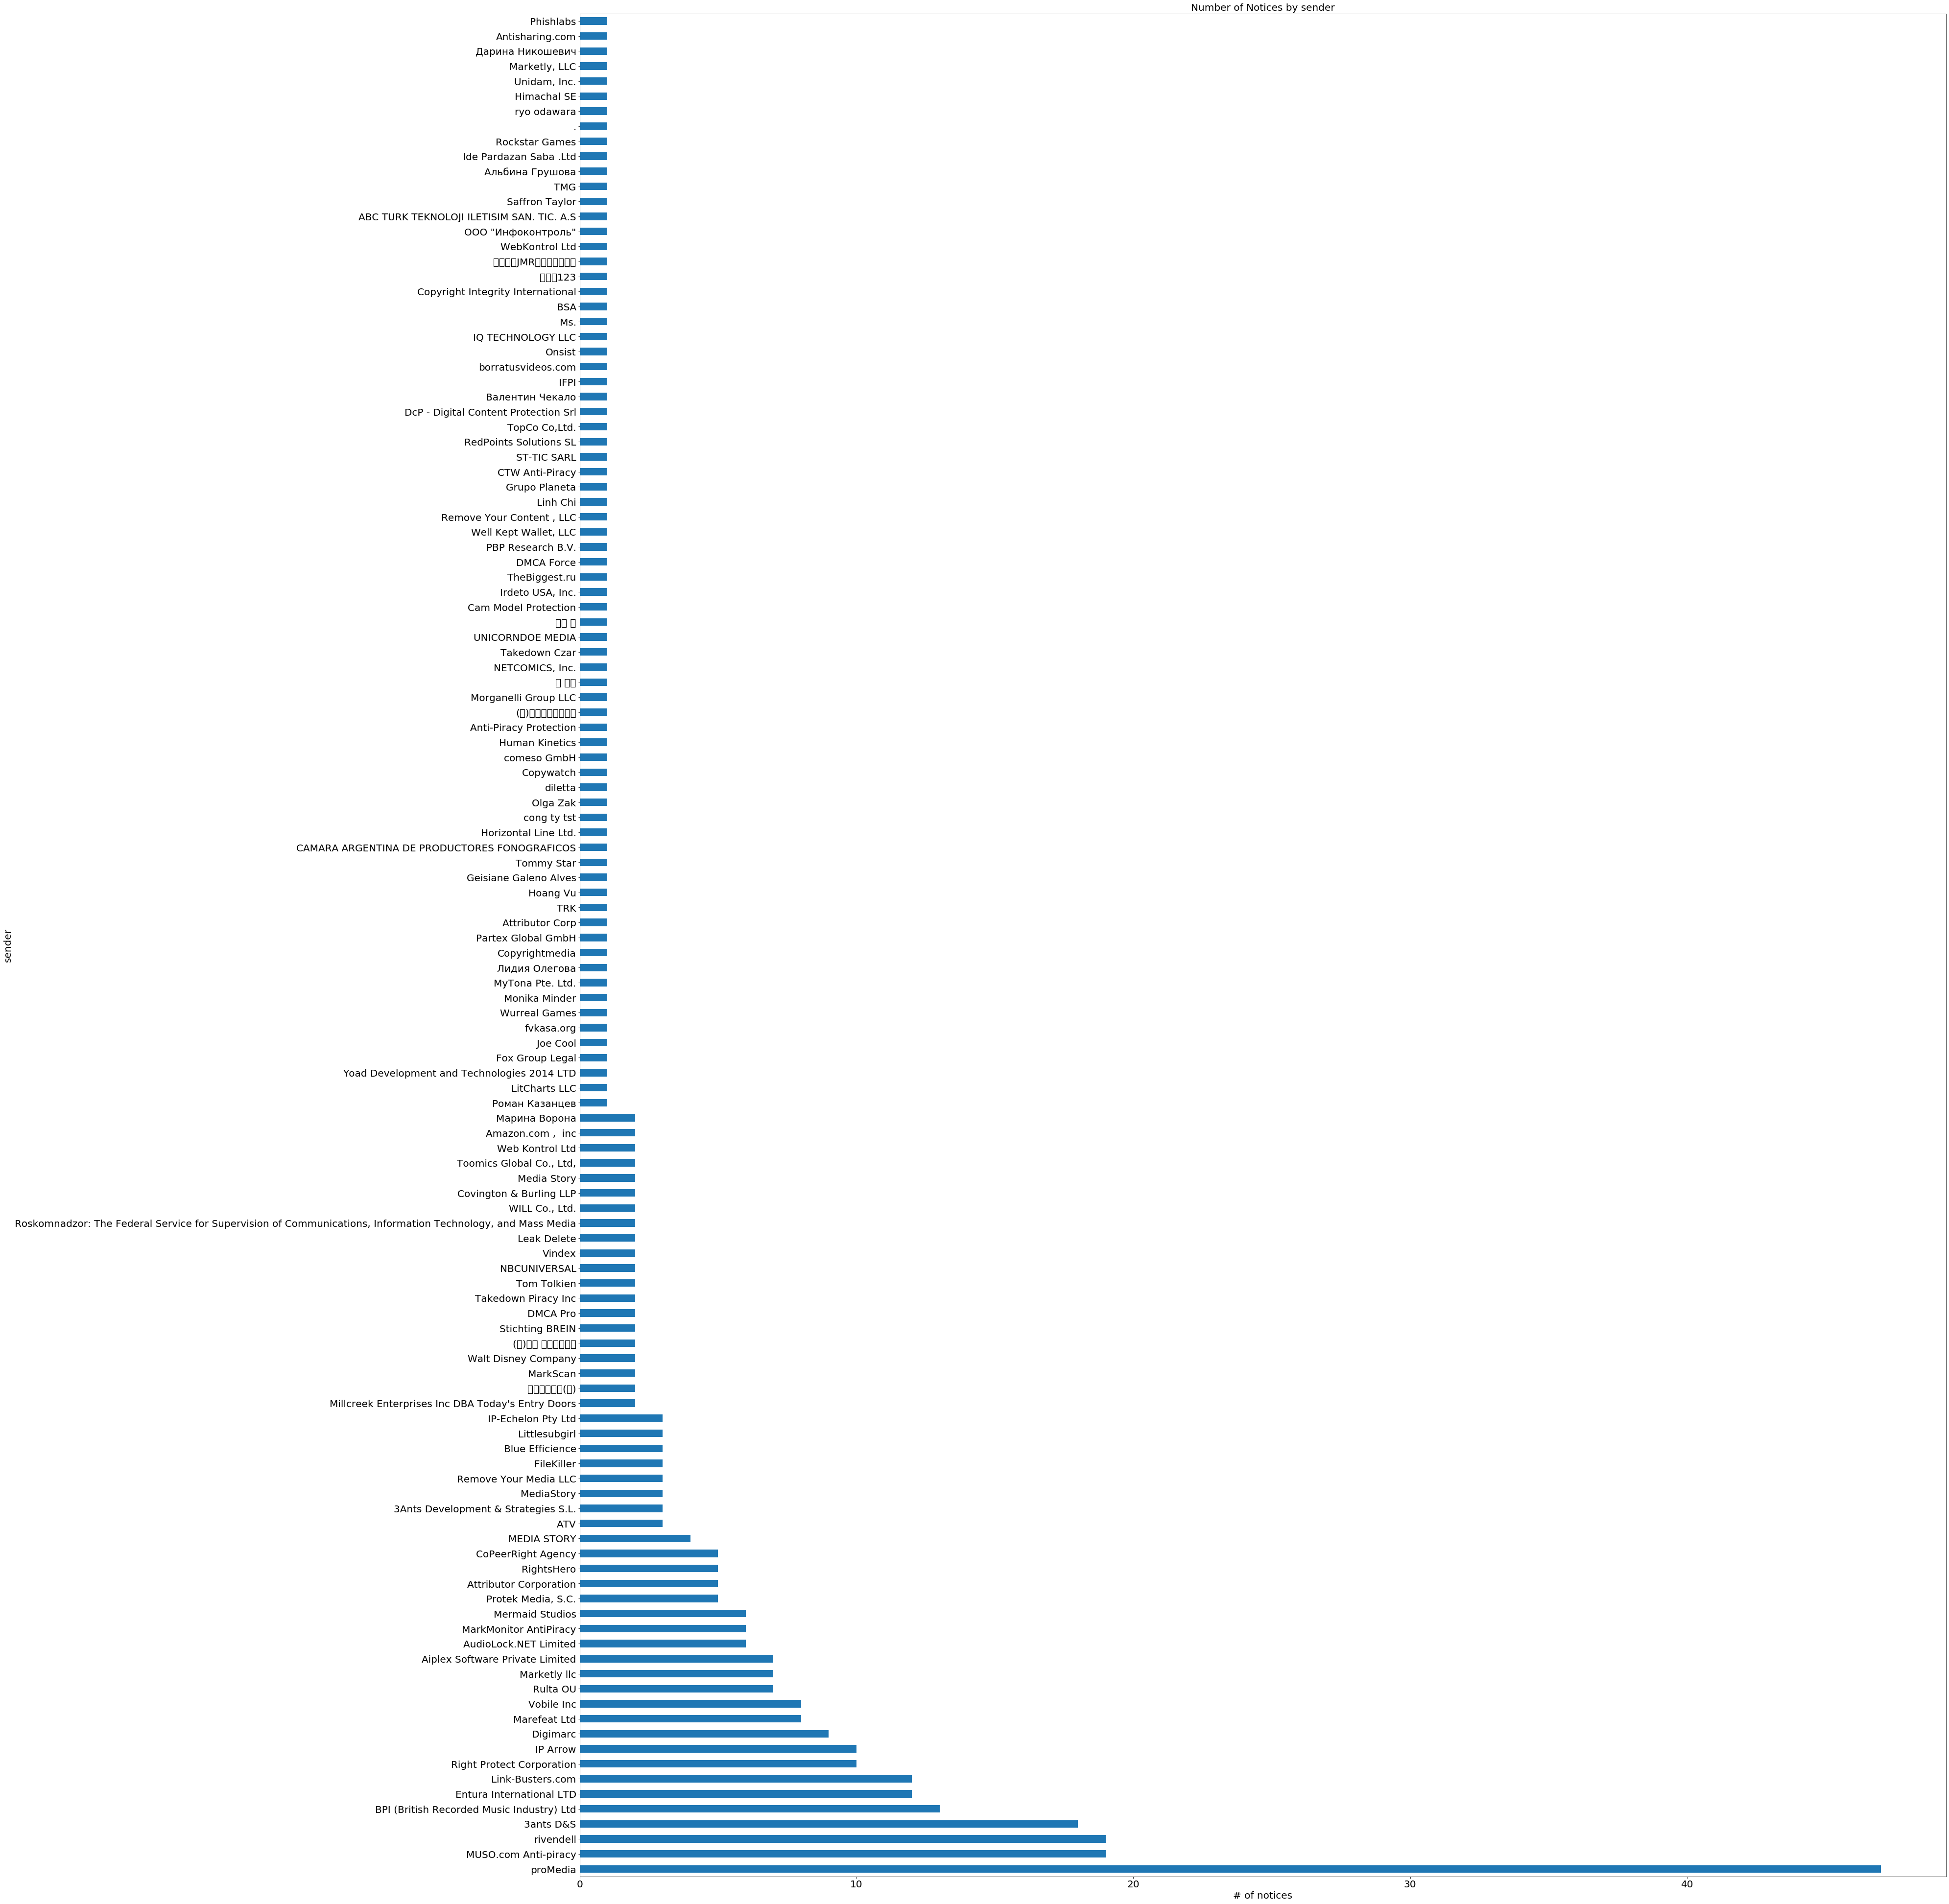

In [179]:
df = pd.read_sql_query("SELECT * from notice", con)
graph1 = df['sender'].str.encode(encoding = 'utf-8').str.decode(encoding = 'utf-8').value_counts(sort = True).plot.barh(figsize = (50, 70), fontsize = 20)
graph1.set_ylabel('sender', fontsize = 20)
graph1.set_xlabel('# of notices', fontsize = 20)
graph1.set_title('Number of Notices by sender',fontsize = 20)

# It may take a little while to display the graph

In [180]:
# Using the bar plot, we can easily find out that half of the senders only sent one or two notices to OSP while most of the notices were sent by some organizations: ProMedia, Muso.com Anti-piracy and rivendell are TOP 3 senders who are always complaining.
# The interesting thing is that ProMedia is not the right owner, it's a firm aiming at helping their clients to management and tracking their data. So does Muso.com Anti-piracy who is a anti-piracy company help clients to protect content. Rivendell also helps to remove illegal URLs.
# We can see that most of the notices were sent by the outsourcing third-party companies. They have a mutual mechanism in this "taking your content down" industry.

Q2. lets have a look at the recipient of the notices: Who are always being complaint in the notice?

In [181]:
df[['recipient','notice_id']].groupby(['recipient']).count() 
# all of the 385 notices were sent to Google LLC which is absolutely the biggest Online Serveice Provider in the world.

,notice_id
recipient,
Google LLC,385


Q3: What are people complaining about?

Text(0.5, 1.0, 'Number of Notices by type')

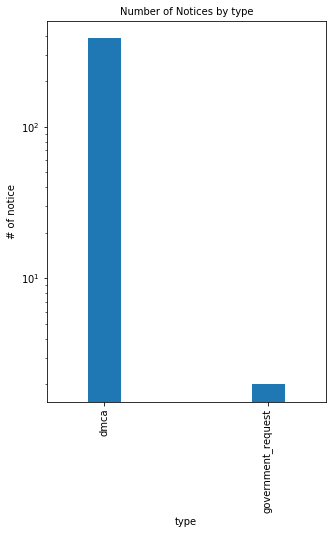

In [182]:
graph2 = df['type'].value_counts(sort = True).plot.bar(figsize = (5, 7), fontsize = 10, logy = True, width = 0.2)
graph2.set_ylabel('# of notice', fontsize = 10)
graph2.set_xlabel('type', fontsize = 10)
graph2.set_title('Number of Notices by type',fontsize = 10)

In [183]:
# There are only two types in the data set I have. However, there should be more types according to Lumen. My data set is too small.
# The number of notices regarding "DMCA" is more than 100 times of notices regarding "government_request". This is reasonable because DMCA is the most powerful law when you want to protect your content on the Internet. 

In [184]:
# We can have a look at the data set firstly.
df2 = pd.read_sql_query("SELECT * from host", con)
# Every url has a country where it is hosting in. A notice_id and A country_id which are foreign keys from other two tables.

Q4: You may noticed that we only have 385 notices but 8158 URLs, how many URLs were stated in one notice?

Text(0.5, 1.0, 'Number of URL by every take down notice')

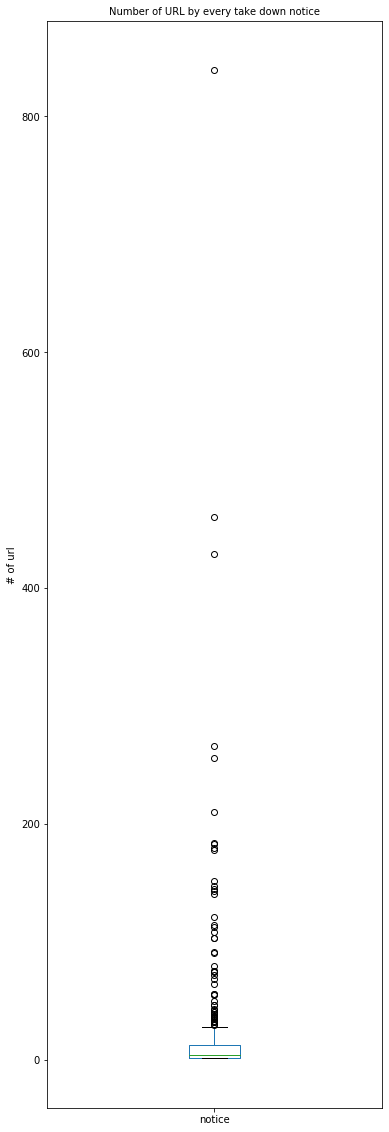

In [185]:
df2 = pd.read_sql_query("SELECT count(url) as notice, notice_id from host group by notice_id", con)
graph3 = df2['notice'].plot.box(figsize=(6,20))
graph3.set_ylabel('# of url', fontsize = 10)
graph3.set_title('Number of URL by every take down notice',fontsize = 10)

In [186]:
# From this box chart, we can see that, the box is really narrow before 3/4, which means that most of the notices contain very small number of URLs.
# However, there are some notices have more that 400 infringing URLs in its body. 

Q5: Can we assume that more facebook users equals to more Internet users? How popular facebook is all over the world?

In [187]:
# The Internet usage table looks like:
df3 = pd.read_sql_query("SELECT * from stat", con) 


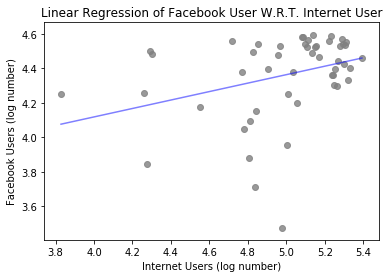

In [188]:
for i in range(len(data)-1, -1, -1):
    if not data[i][0] or not data[i][1]:
        del data[i]
data.sort(key=lambda i: i[0])
x = [i[0] for i in data]
y = [i[1] for i in data]
plt.scatter(np.log(x), np.log(y), alpha=0.8, color='grey')
b0, b1 = polyfit(np.log(x), np.log(y), 1)
plt.plot(np.log(x), b0 + b1 * np.log(x), '-', alpha=0.5, color='blue')
plt.title('Linear Regression of Facebook User W.R.T. Internet User')
plt.xlabel('Internet Users (log number)')
plt.ylabel('Facebook Users (log number)')
plt.show()

In [189]:
# This scatter plot tells us, there is correlation between facebook user and Internet user. The relation between them is proportional. 
# More facebook users equals to more Internet users.

Q6: Where are the infringing URLs hosted?

In [195]:
cur.execute("select country, count(url) from host group by country_id")
data = cur.fetchall()
# collect country code (e.g. Brazil - BRA) from a online data source (World GDP 2014)
df_GDP = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
data_list = [list(i)+[df_GDP[df_GDP.COUNTRY == i[0]]['CODE'].values[0]] for i in data]
df = pd.DataFrame(data_list, columns = ['COUNTRY', 'COUNT', 'CODE']) 
fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'],
    z = df['COUNT'],
    text = df['COUNTRY'],
    autocolorscale=True,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix='',
    colorbar_title='Infringing URL number',
))
fig.show()

In [191]:
# from this figure, we can see that more than 73.7% infringing URLs are hosting in the USA. Russia is the second biggest host of infringing URLs.
# Most of them are host in the North America and the Europe.

Q7: Does higher penetration of Internet means hosting more infringing URLs in one country?

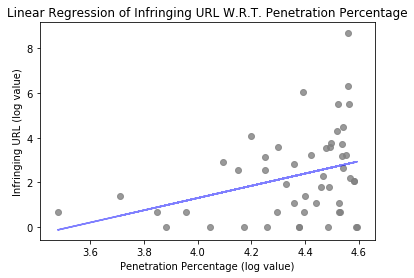

In [192]:
cur.execute("select country_id, penetration, count(url) from t1 group by(country_id)")
data = cur.fetchall()
data.sort(key=lambda i: i[0])
x = [i[1] for i in data]
y = [i[2] for i in data]
plt.scatter(np.log(x), np.log(y), alpha=0.8, color='grey')
b0, b1 = polyfit(np.log(x), np.log(y), 1)
plt.plot(np.log(x), b0 + b1 * np.log(x), '-', alpha=0.5, color='blue')
plt.title('Linear Regression of Infringing URL W.R.T. Penetration Percentage')
plt.xlabel('Penetration Percentage (log value)')
plt.ylabel('Infringing URL (log value)')
plt.show()

In [193]:
# With the higher penetration percentage of Internet, there will be more infringing URLs. Our assumption is correct.
# The penetration percentage reflects the technological strength of the country to some extent. Higer level of technology, more websites generated from the country.